In [3]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras import regularizers
from keras.utils import np_utils
from keras.datasets import mnist

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#! pip install --upgrade numpy --user

  Using cached https://files.pythonhosted.org/packages/ed/29/d97b6252591da5f8add0d25eecda296ea72729a0aad7998edba1981b47c8/numpy-1.16.2-cp36-cp36m-win_amd64.whl


  The script f2py.exe is installed in 'C:\Users\npurk\AppData\Roaming\Python\Python36\Scripts' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
# Version check

import keras
import tensorflow as tf

print('NumPy version :' , np.__version__)
print('Keras version' , keras.__version__)
print('With tensorflow backend, version : ', tf.__version__ )

NumPy version : 1.16.2
Keras version 2.2.4
With tensorflow backend, version :  1.13.1


In [5]:
# Load data

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
# Check type and dimensions

type(x_train[0]), x_train.shape, y_train.shape

(numpy.ndarray, (60000, 28, 28), (60000,))

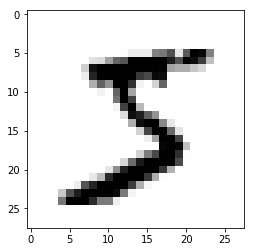

In [7]:
# Plot out an example

plt.imshow(x_train[0], cmap = plt.cm.binary)

In [8]:
# Normalize data

x_train = keras.utils.normalize(x_train, axis=1)  # scaling the pixel values that are between 0-225
x_test = keras.utils.normalize(x_test, axis=1)    
                                                  #experiment without normalization, makes difference in learning

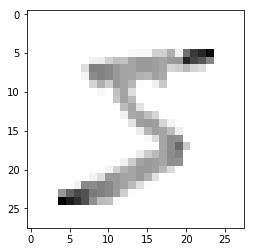

In [9]:
# Plot normalized

plt.imshow(x_train[0], cmap = plt.cm.binary)

In [10]:
# Build a model : feed forward net

model = Sequential() 

model.add(Flatten(input_shape=(28, 28,)))
model.add(Dense(1024, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))      #, kernel_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Dense(28, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
# compile model

model.compile(optimizer='adam',#'sgd'
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']) 


In [12]:
# View model config

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_2 (Dense)              (None, 28)                28700     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                290       
Total params: 832,830
Trainable params: 832,830
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Initiate training session

model.fit(x_train , y_train, epochs=5, batch_size=100) # other arguments validation split=0.33, batch size=10

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 10s 173us/step - loss: 0.3579 - acc: 0.9184
Epoch 2/5
19500/60000 [========>.....................] - ETA: 6s - loss: 0.1950 - acc: 0.9622

KeyboardInterrupt: 

In [22]:
# Evaluate on test set

model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 98us/step


[0.1425468367099762, 0.9759]

In [23]:
# Save model 

model.save('mnist_nn.model')

In [24]:
# Load model

load_model = keras.models.load_model('mnist_nn.model')  #nesting & function argument

In [25]:
#use the inference graph generated by the model to predict class labels on our test set

predictions = load_model.predict([x_test])

In [46]:
# Choose individuaL sample from test set 
sample_index = 1

#print maximum predicticted value sample
print('Network thinks it is seeing the number : |', np.argmax(predictions[sample_index]), '|')

Network thinks it is seeing the number : | 2 |


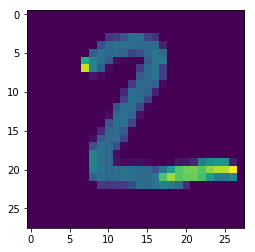

In [47]:
# Plot the actual sample to verify

plt.imshow(x_test[sample_index])